# Pizza Detection YOLO11 Training & Validation (With colab GPU)

This notebook focuses on training and validating a YOLO11 model for pizza detection using our custom dataset.

## Dataset Overview
- **Dataset**: soho_pizza.v2-roboflow-instant-2--eval-.yolov11
- **Classes**: 1 (pizza)
- **Format**: YOLOv11 compatible

## Setup and Installation

In [ ]:
!unzip /content/soho_pizza.v2-roboflow-instant-2--eval-.yolov11.zip

In [3]:
# Check GPU availability
!nvidia-smi

Fri Jun 27 04:53:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

HOME = os.getenv('BASE_DIR', os.getcwd())
print(f"Working directory: {HOME}")

# Display loaded environment variables
print("\n📁 Environment Configuration:")
print(f"Dataset: {os.getenv('DATASET_NAME', 'Not set')}")
print(f"Model: {os.getenv('YOLO_MODEL', 'Not set')}")
print(f"Epochs: {os.getenv('TRAINING_EPOCHS', 'Not set')}")
print(f"Batch size: {os.getenv('TRAINING_BATCH', 'Not set')}")
print(f"Image size: {os.getenv('TRAINING_IMGSZ', 'Not set')}")
print(f"Confidence threshold: {os.getenv('INFERENCE_CONF', 'Not set')}")

Working directory: C:\Users\Admin\Desktop\pizza_counter\model

📁 Environment Configuration:
Dataset: soho_pizza.v2-roboflow-instant-2--eval-.yolov11
Model: yolo11m.pt
Epochs: 20
Batch size: 16
Image size: 640
Confidence threshold: 0.25


In [ ]:
# Install required packages
%pip install "ultralytics<=8.3.40" supervision python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

In [6]:
# Import and check ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.8/112.6 GB disk)


## Dataset Configuration

In [ ]:
import os

# Set dataset paths using environment variables
DATASET_NAME = os.getenv('DATASET_NAME', 'soho_pizza.v2-roboflow-instant-2--eval-.yolov11')
DATA_YAML_NAME = os.getenv('DATA_YAML_NAME', 'data.yaml')

HOME = os.getenv('HOME', '/home/user')  # Default to '/home/user' if HOME is not set

DATASET_PATH = os.path.join(HOME, DATASET_NAME)
DATA_YAML = os.path.join(DATASET_PATH, DATA_YAML_NAME)

print(f"Dataset path: {DATASET_PATH}")
print(f"Data config: {DATA_YAML}")
print(f"Using dataset: {DATASET_NAME}")


Dataset path: /content/soho_pizza.v2-roboflow-instant-2--eval-.yolov11
Data config: /content/soho_pizza.v2-roboflow-instant-2--eval-.yolov11/data.yaml


In [10]:
# Read and display data.yaml configuration
with open(DATA_YAML, 'r') as f:
    data_config = f.read()
    print("Dataset configuration:")
    print(data_config)

Dataset configuration:
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['pizza']

roboflow:
  workspace: demo-1-xswfm
  project: soho_pizza
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/demo-1-xswfm/soho_pizza/dataset/2


In [11]:
# Verify dataset is ready for training
train_imgs = os.path.join(DATASET_PATH, "train", "images")
train_labels = os.path.join(DATASET_PATH, "train", "labels")
val_imgs = os.path.join(DATASET_PATH, "valid", "images")
val_labels = os.path.join(DATASET_PATH, "valid", "labels")

print("Dataset verification:")
print(f"Train images exist: {os.path.exists(train_imgs)}")
print(f"Train labels exist: {os.path.exists(train_labels)}")
print(f"Validation images exist: {os.path.exists(val_imgs)}")
print(f"Validation labels exist: {os.path.exists(val_labels)}")

if all([os.path.exists(p) for p in [train_imgs, train_labels, val_imgs, val_labels]]):
    print("✅ Dataset structure is valid for training!")
else:
    print("❌ Dataset structure is incomplete!")

Dataset verification:
Train images exist: True
Train labels exist: True
Validation images exist: True
Validation labels exist: True
✅ Dataset structure is valid for training!


## Custom Training

Training YOLO11 model on our custom pizza dataset.

In [ ]:
import os

# Train YOLO11 model using environment variables
MODEL = os.getenv('YOLO_MODEL', 'yolo11m.pt')
EPOCHS = os.getenv('TRAINING_EPOCHS', '50')
IMGSZ = os.getenv('TRAINING_IMGSZ', '640')
BATCH = os.getenv('TRAINING_BATCH', '16')
PATIENCE = os.getenv('TRAINING_PATIENCE', '5')
PLOTS = os.getenv('TRAINING_PLOTS', 'True').lower() == 'true'

print(f"🚀 Starting training with configuration:")
print(f"Model: {MODEL}")
print(f"Epochs: {EPOCHS}")
print(f"Image size: {IMGSZ}")
print(f"Batch size: {BATCH}")
print(f"Patience: {PATIENCE}")
print(f"Plots: {PLOTS}")

!yolo task=detect mode=train model="{MODEL}" data="{DATA_YAML}" epochs={EPOCHS} imgsz={IMGSZ} plots={PLOTS} batch={BATCH} patience={PATIENCE}

New https://pypi.org/project/ultralytics/8.3.159 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/soho_pizza.v2-roboflow-instant-2--eval-.yolov11/data.yaml, epochs=50, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fal

## Training Results Analysis

In [50]:
# Find the latest training run
import glob

train_results_dir = max(glob.glob(f'{HOME}/runs/detect/train*/'), key=os.path.getmtime)
print(f"Latest training results: {train_results_dir}")

Latest training results: /content/runs/detect/train2/


Confusion Matrix:


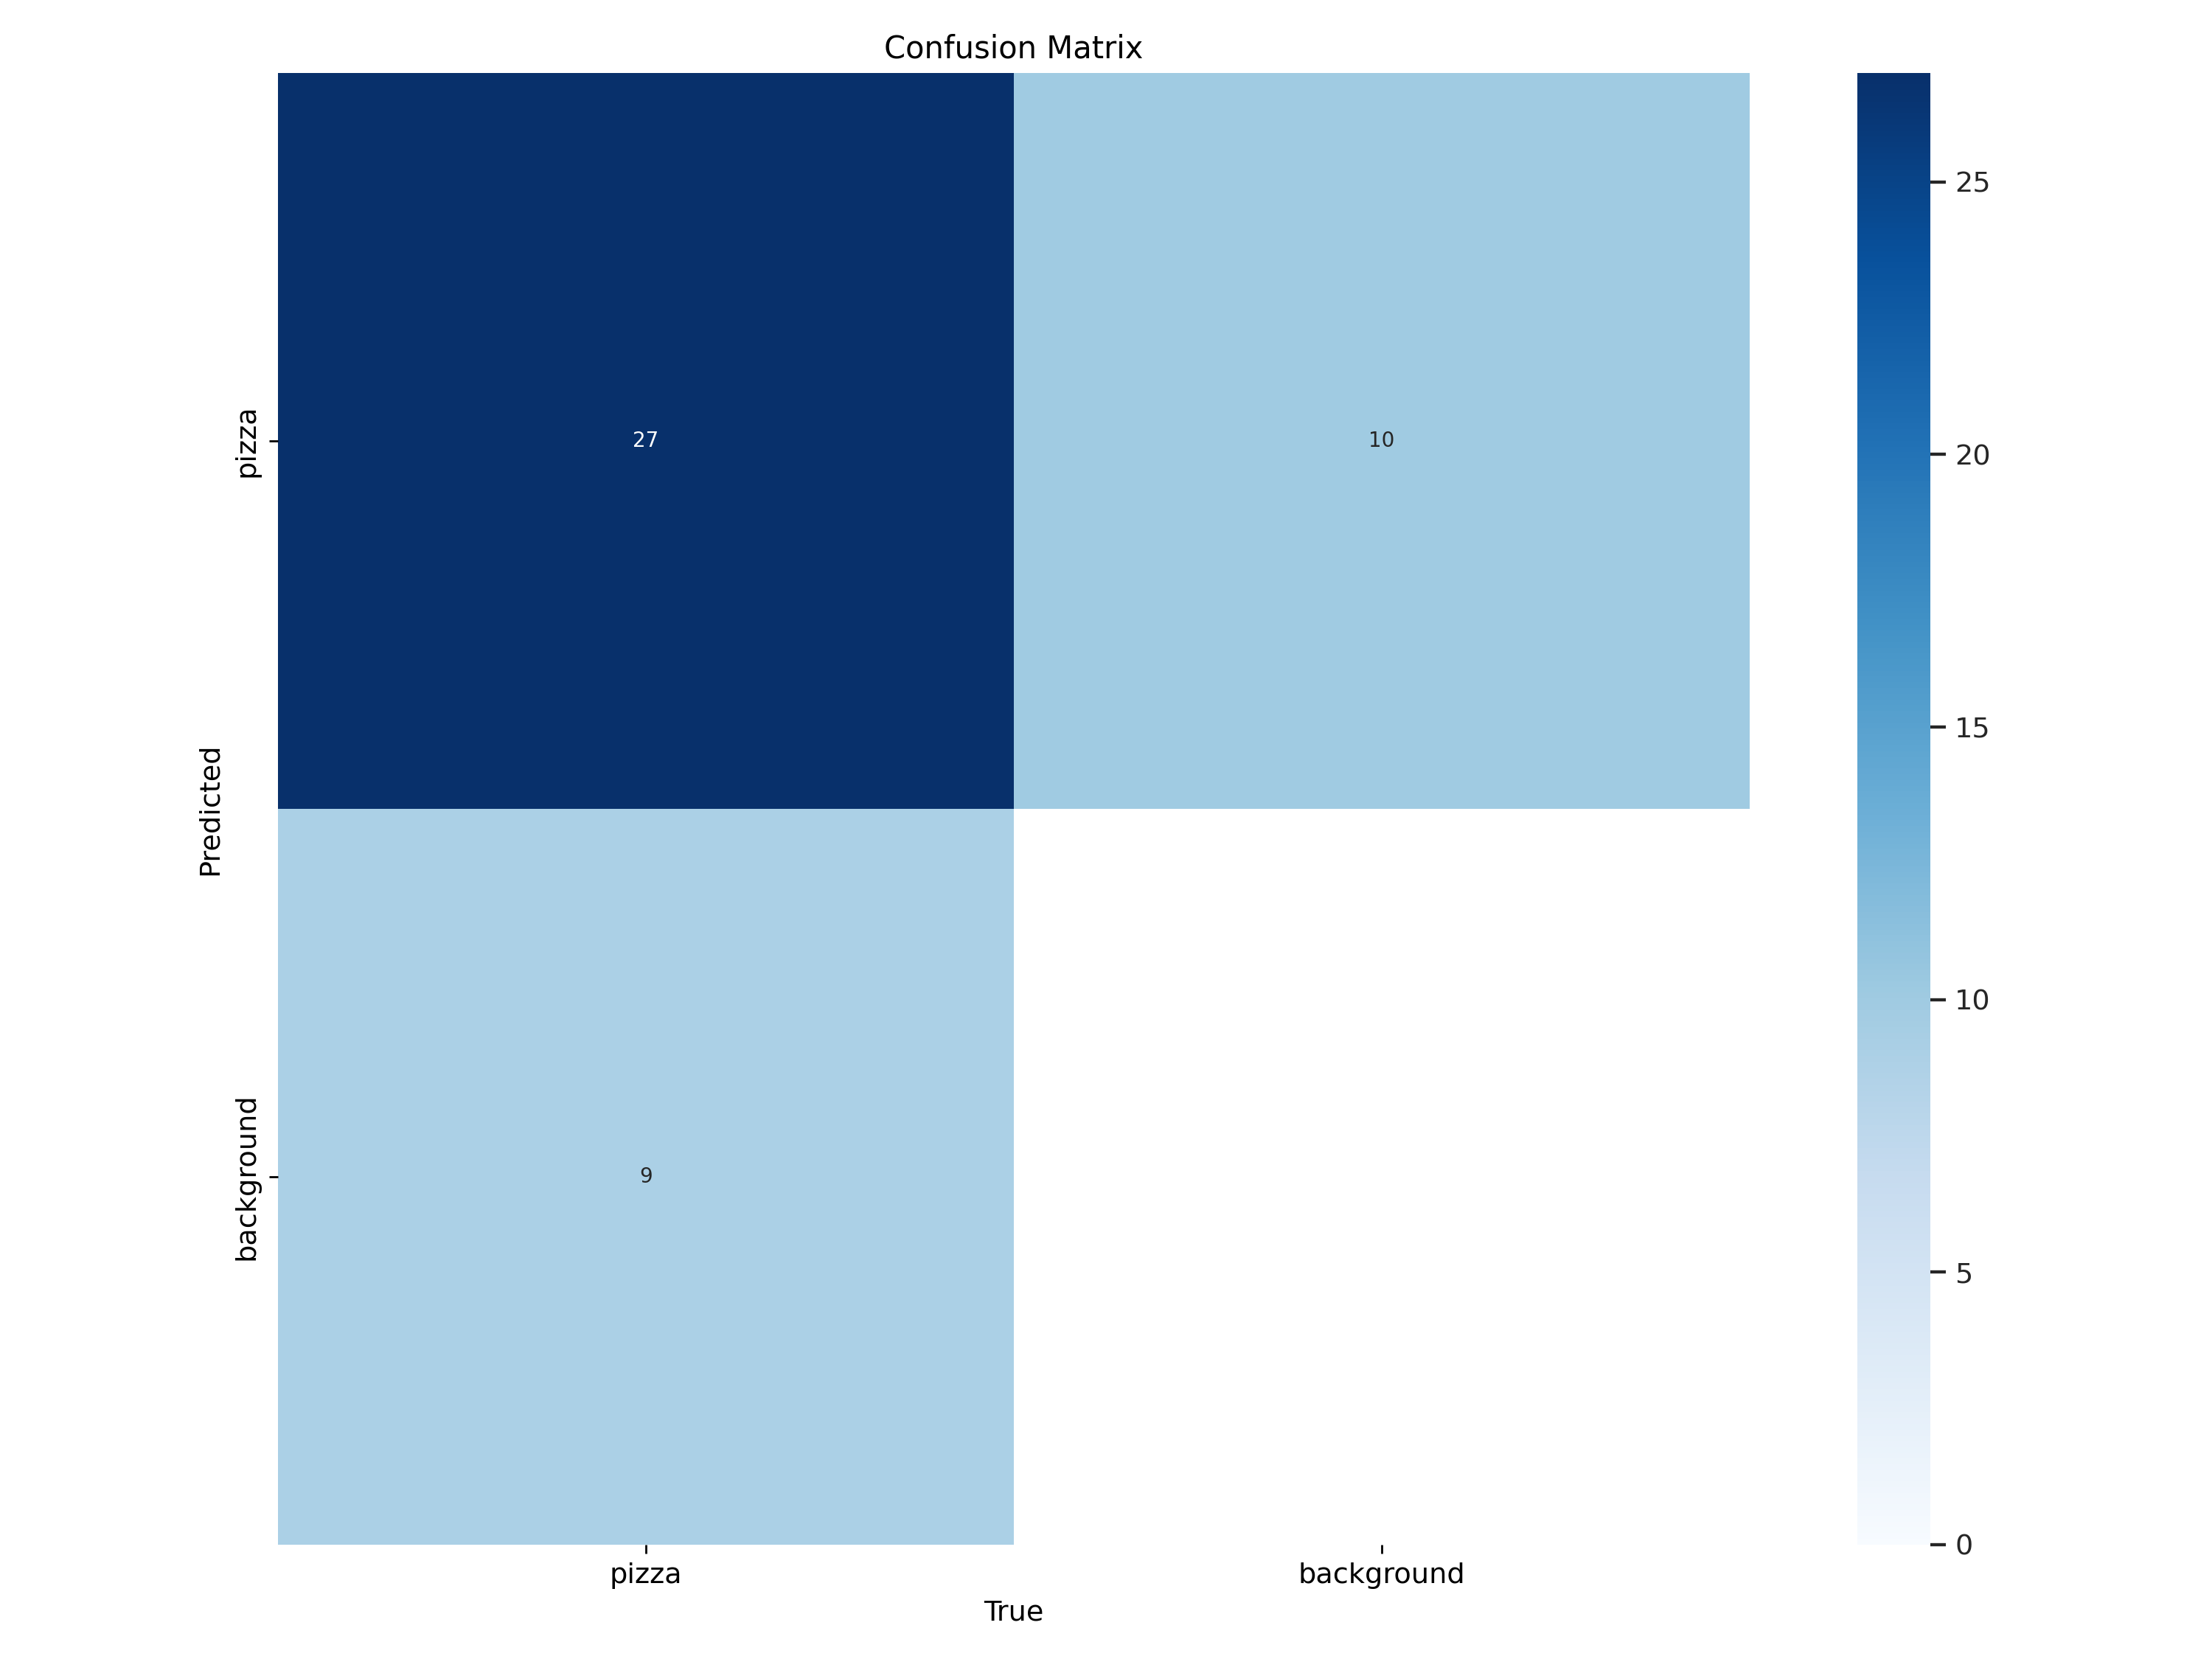

In [ ]:
# Display confusion matrix
from IPython.display import Image as IPyImage
import os

DISPLAY_WIDTH = int(os.getenv('DISPLAY_WIDTH', '600'))

confusion_matrix_path = os.path.join(train_results_dir, "confusion_matrix.png")
print("Confusion Matrix:")
IPyImage(filename=confusion_matrix_path, width=DISPLAY_WIDTH)

Training Results:


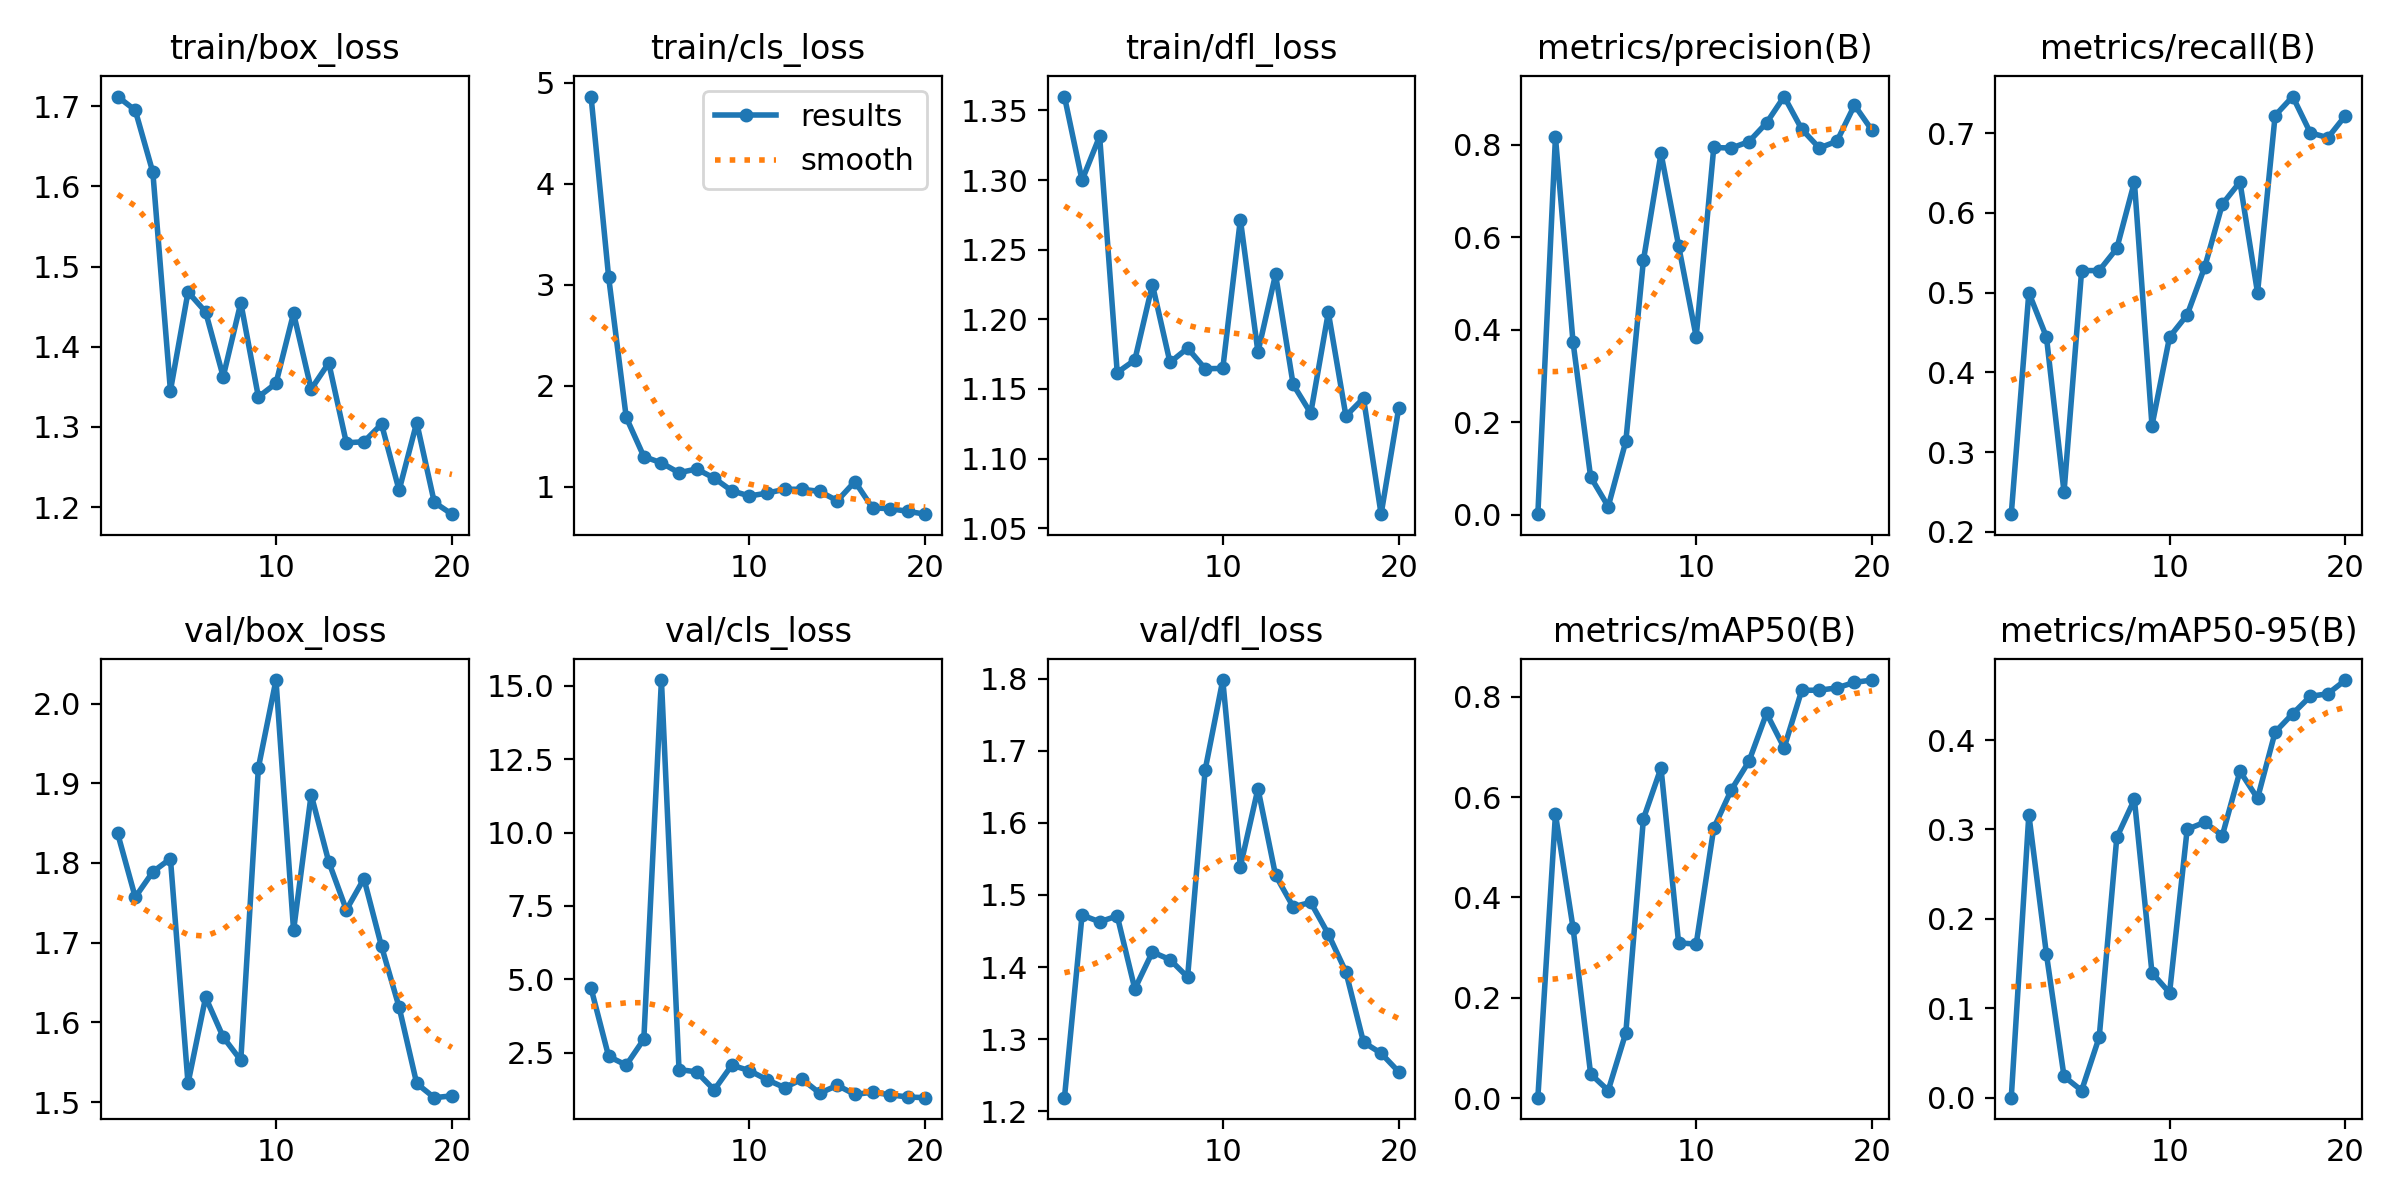

In [ ]:
# Display training results
RESULTS_DISPLAY_WIDTH = int(os.getenv('RESULTS_DISPLAY_WIDTH', '800'))

results_path = os.path.join(train_results_dir, "results.png")
print("Training Results:")
IPyImage(filename=results_path, width=RESULTS_DISPLAY_WIDTH)

Validation Batch Predictions:


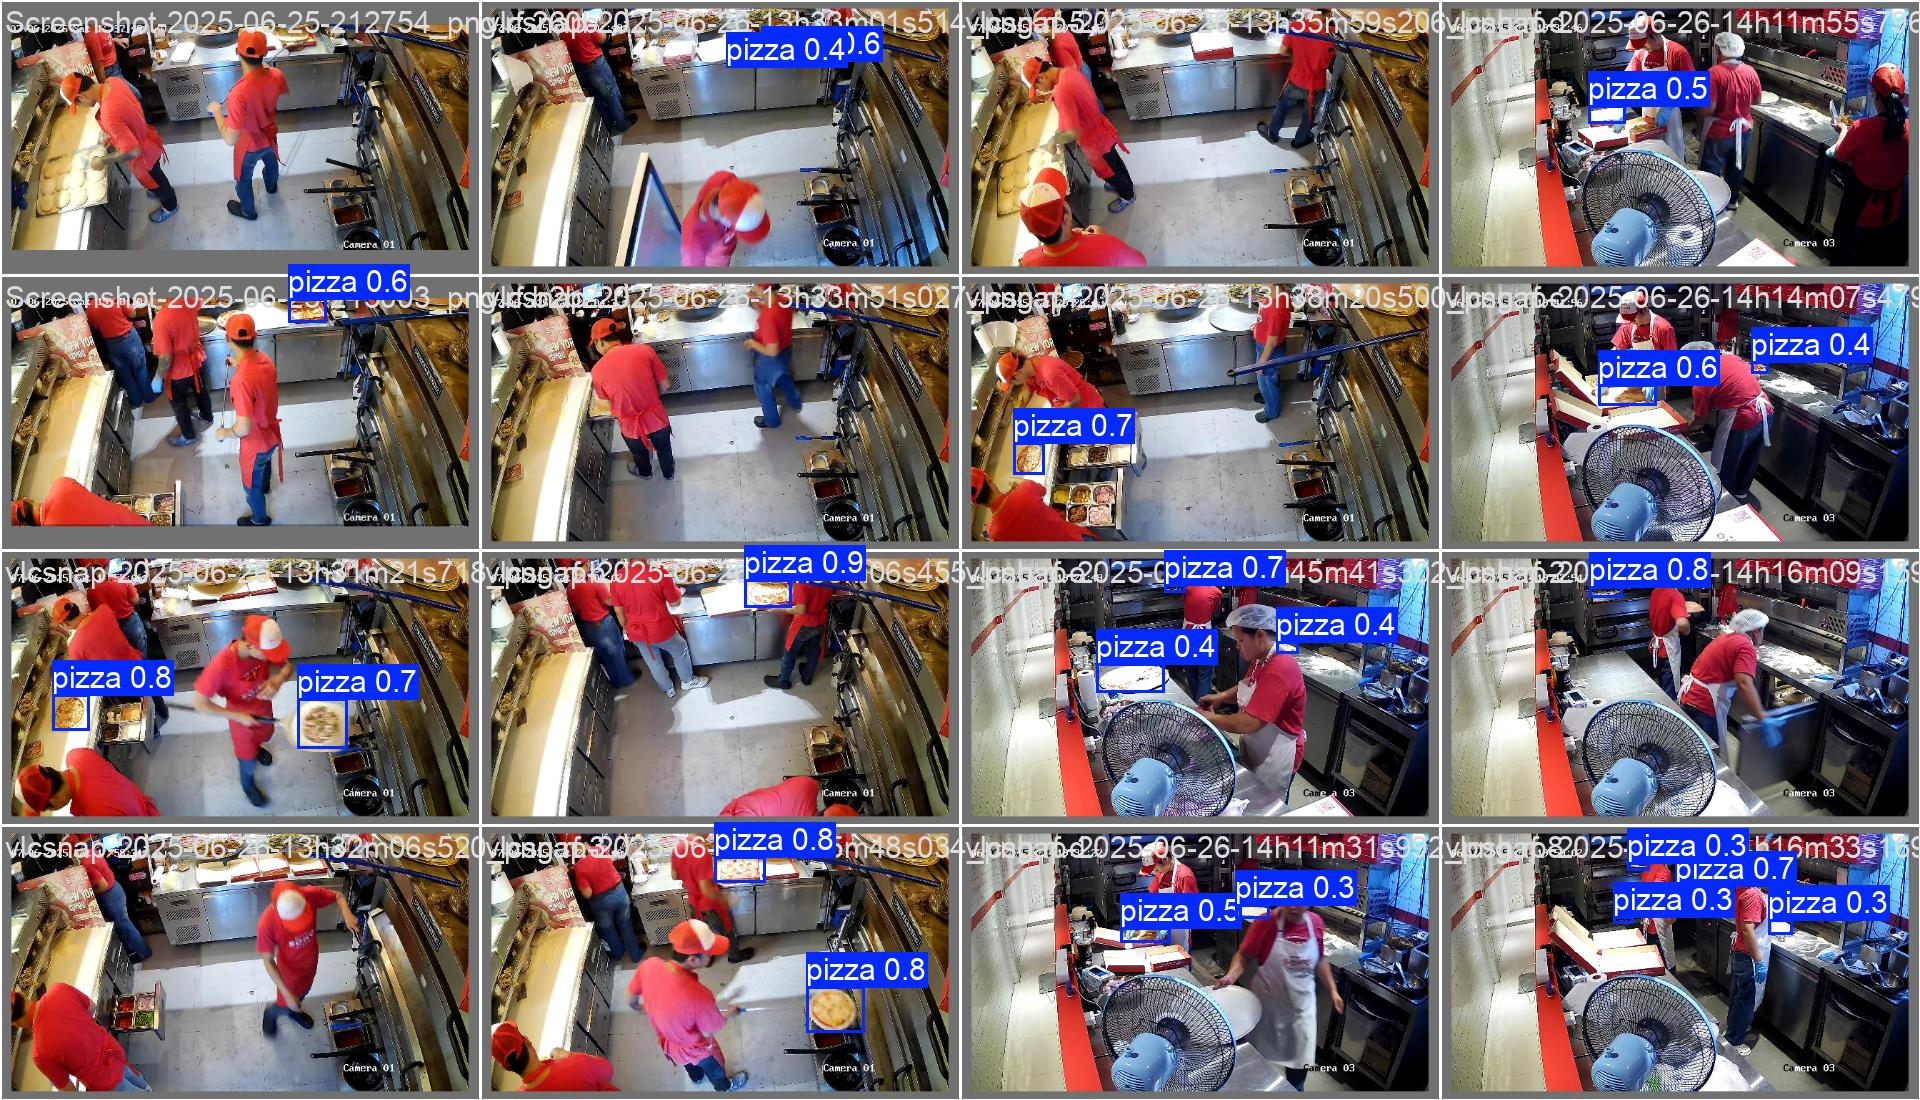

In [ ]:
# Display validation batch predictions
RESULTS_DISPLAY_WIDTH = int(os.getenv('RESULTS_DISPLAY_WIDTH', '800'))

val_batch_path = os.path.join(train_results_dir, "val_batch0_pred.jpg")
print("Validation Batch Predictions:")
IPyImage(filename=val_batch_path, width=RESULTS_DISPLAY_WIDTH)

## Validate Fine-tuned Model

Validate the trained model on the test dataset to evaluate performance.

In [55]:
# Set up model path for validation
best_model_path = os.path.join(train_results_dir, "weights", "best.pt")
print(f"Model path: {best_model_path}")

Model path: /content/runs/detect/train2/weights/best.pt


In [ ]:
import os

# Run model validation using environment variables
VALIDATION_SPLIT = os.getenv('VALIDATION_SPLIT', 'test')

print(f"🔍 Running validation on split: {VALIDATION_SPLIT}")
!yolo task=detect mode=val model="{best_model_path}" data="{DATA_YAML}" split="{VALIDATION_SPLIT}"

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 303 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
val: Scanning /content/soho_pizza.v2-roboflow-instant-2--eval-.yolov11/test/labels.cache... 13 images, 1 backgrounds, 0 corrupt: 100% 13/13 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.94it/s]
                   all         13         23      0.949      0.815      0.891      0.536
Speed: 0.2ms preprocess, 17.8ms inference, 0.0ms loss, 11.3ms postprocess per image
Results saved to runs/detect/val5
💡 Learn more at https://docs.ultralytics.com/modes/val


In [57]:
val_results_dir = max(glob.glob(f'{HOME}/runs/detect/val*/'), key=os.path.getmtime)

Confusion Matrix:


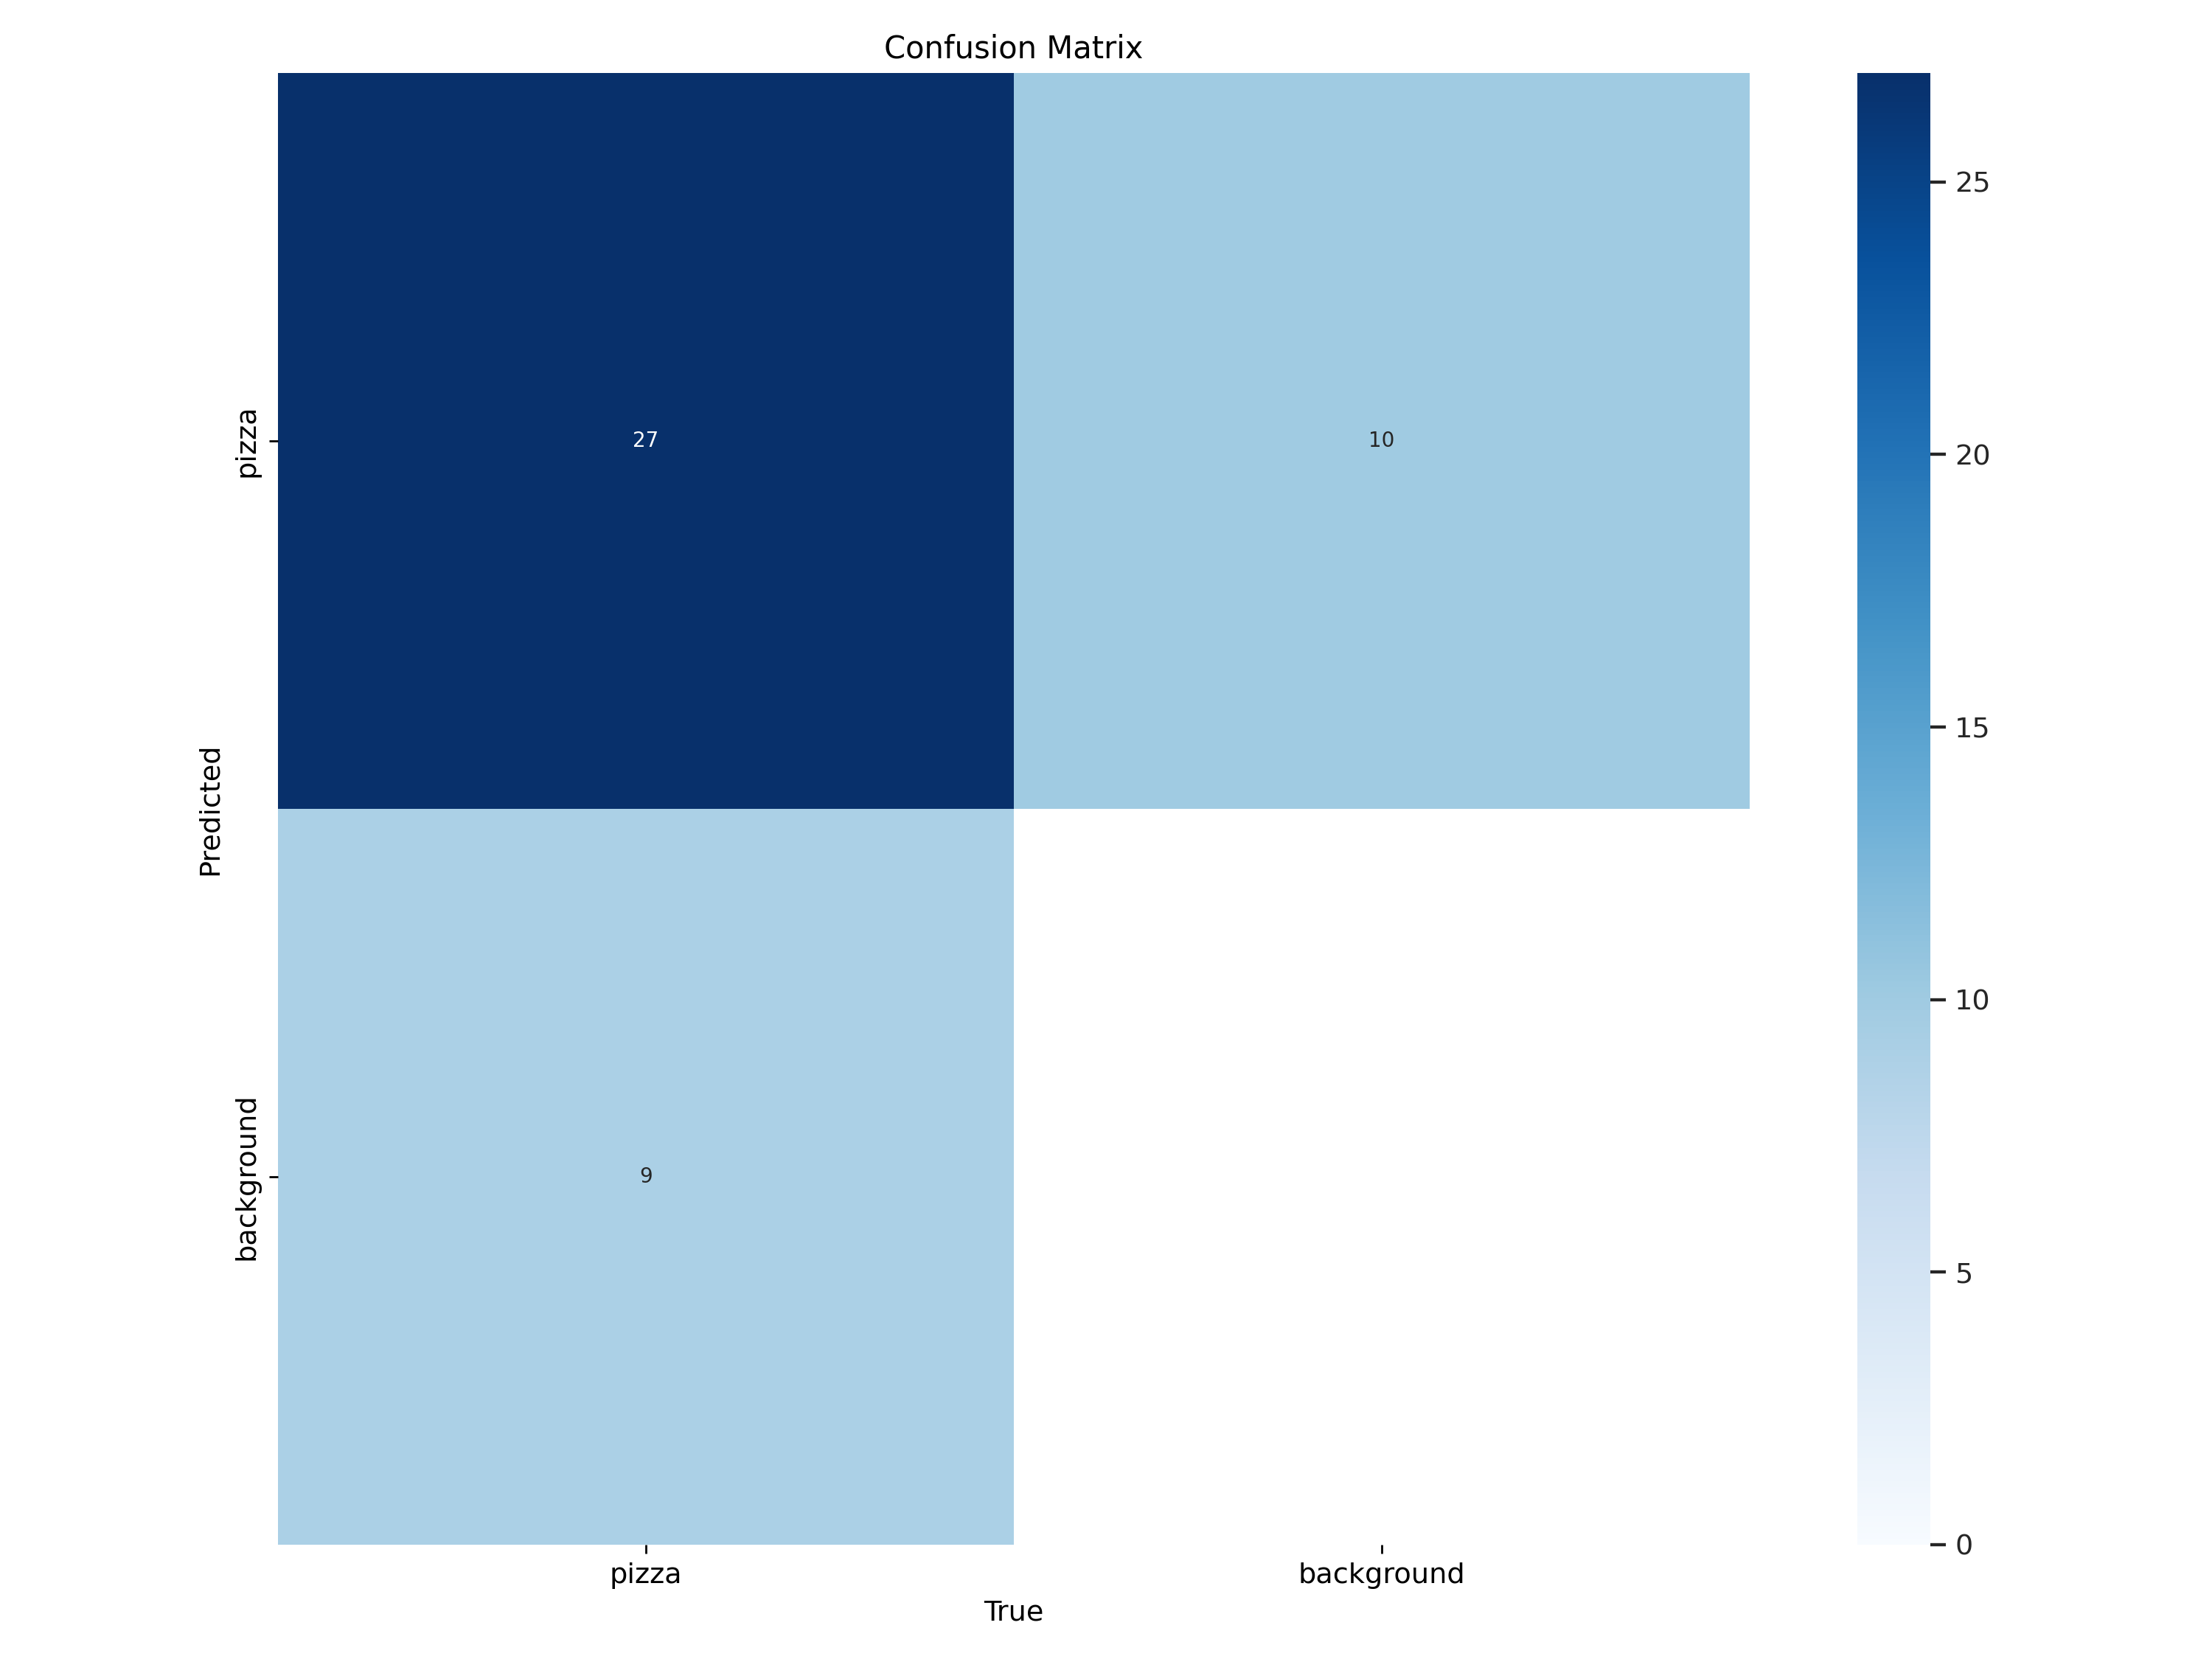

In [ ]:
# Display confusion matrix from validation
from IPython.Display import Image as IPyImage
import os

DISPLAY_WIDTH = int(os.getenv('DISPLAY_WIDTH', '600'))

# Use validation results directory for confusion matrix
val_confusion_matrix_path = os.path.join(val_results_dir, "confusion_matrix.png")
if os.path.exists(val_confusion_matrix_path):
    print("Validation Confusion Matrix:")
    IPyImage(filename=val_confusion_matrix_path, width=DISPLAY_WIDTH)
else:
    # Fallback to training confusion matrix
    confusion_matrix_path = os.path.join(train_results_dir, "confusion_matrix.png")
    print("Training Confusion Matrix:")
    IPyImage(filename=confusion_matrix_path, width=DISPLAY_WIDTH)

## Inference with Custom Model

Test the trained model on test images to see detection results.

In [59]:
# Set test images path
test_images_path = os.path.join(DATASET_PATH, "test", "images")
print(f"Test images path: {test_images_path}")

Test images path: /content/soho_pizza.v2-roboflow-instant-2--eval-.yolov11/test/images


In [ ]:
import os

# Run inference on test images using environment variables
INFERENCE_CONF = os.getenv('INFERENCE_CONF', '0.25')
INFERENCE_SAVE = os.getenv('INFERENCE_SAVE', 'True').lower() == 'true'

print(f"🔮 Running inference with confidence threshold: {INFERENCE_CONF}")
print(f"Save results: {INFERENCE_SAVE}")

!yolo task=detect mode=predict model="{best_model_path}" conf={INFERENCE_CONF} source="{test_images_path}" save={INFERENCE_SAVE}

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 303 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs

image 1/13 /content/soho_pizza.v2-roboflow-instant-2--eval-.yolov11/test/images/Screenshot-2025-06-25-212817_png.rf.caef465a649a4dab0a9ff104cf4c35a1.jpg: 320x640 (no detections), 58.2ms
image 2/13 /content/soho_pizza.v2-roboflow-instant-2--eval-.yolov11/test/images/Screenshot-2025-06-25-213033_png.rf.717c2bfd28cbc0499aff0b82d1a0c0cf.jpg: 320x640 2 pizzas, 23.2ms
image 3/13 /content/soho_pizza.v2-roboflow-instant-2--eval-.yolov11/test/images/vlcsnap-2025-06-26-13h32m37s926_png.rf.bb32a90981e26dcffefb1a0ec952c016.jpg: 384x640 1 pizza, 47.9ms
image 4/13 /content/soho_pizza.v2-roboflow-instant-2--eval-.yolov11/test/images/vlcsnap-2025-06-26-13h35m31s812_png.rf.1e1fa856e07e035ac8fa7c8432c72bbf.jpg: 384x640 1 pizza, 23.9ms
image 5/13 /content/soho_pizza.v2-roboflow-instant-2--eval-.yolov11/test/images/vlcsnap-2025-06-26-13h36m

Inference results in: /content/runs/detect/predict2/
Found 13 prediction images

Prediction 1: Screenshot-2025-06-25-213033_png.rf.717c2bfd28cbc0499aff0b82d1a0c0cf.jpg


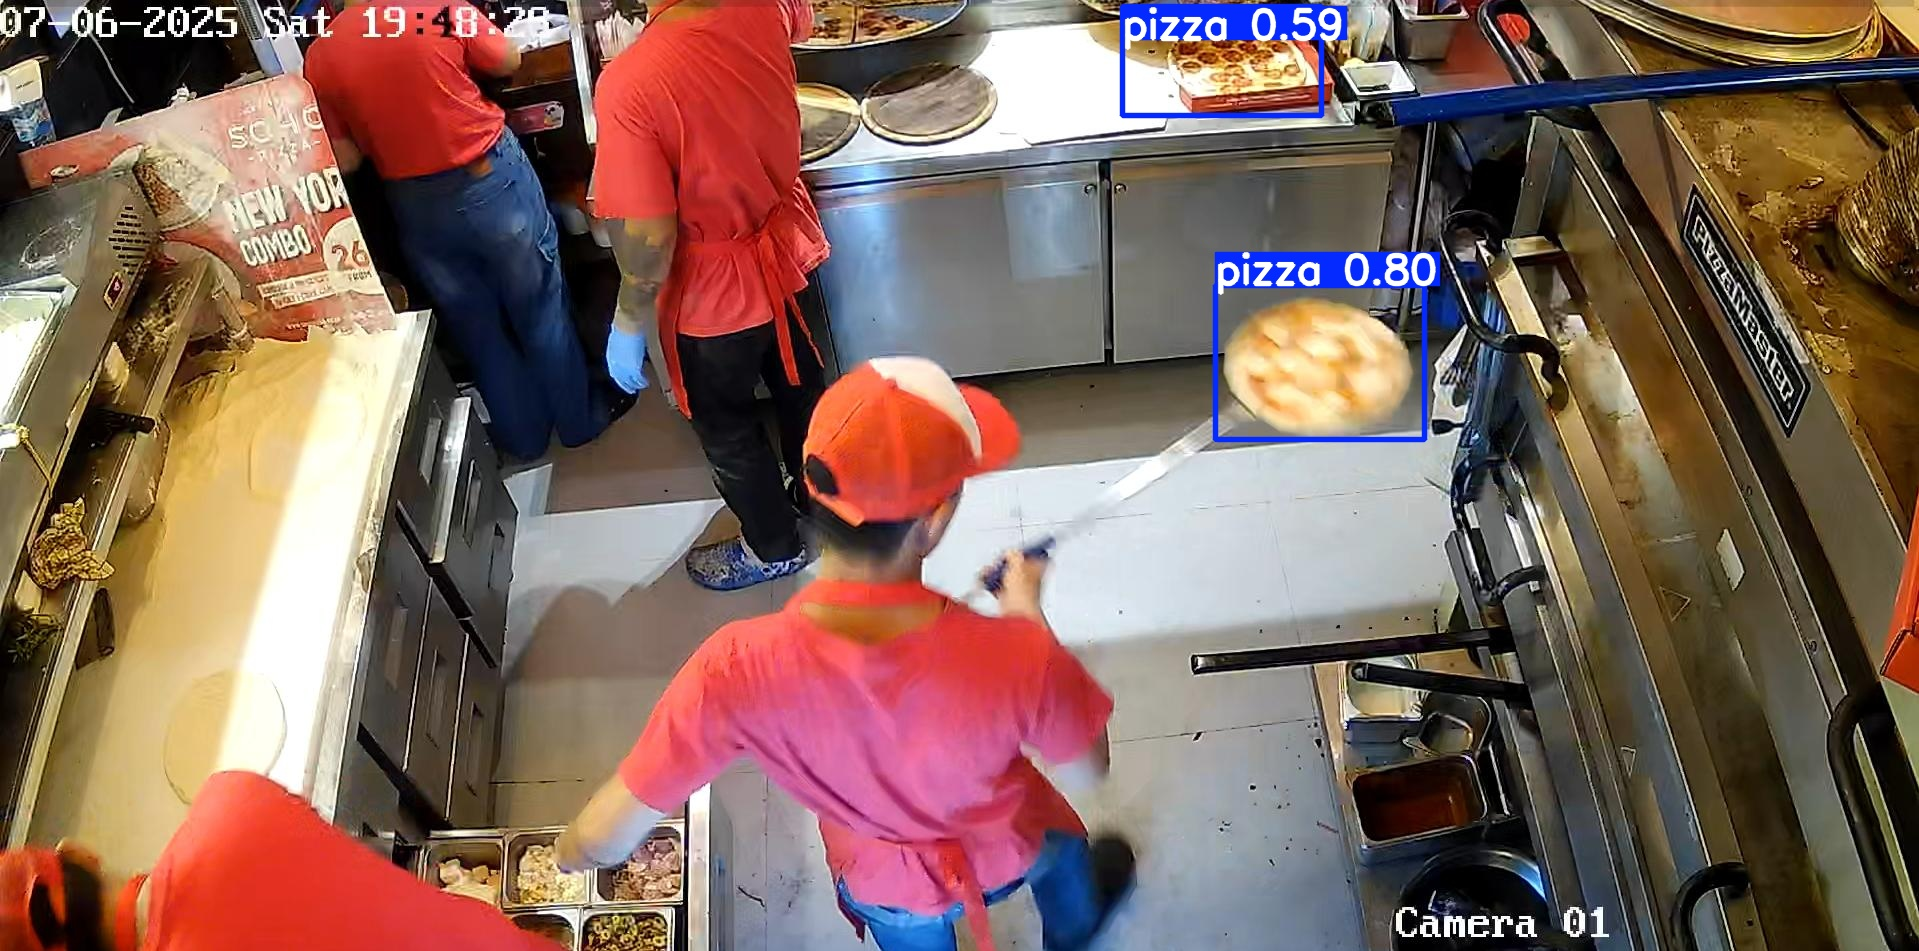


Prediction 2: vlcsnap-2025-06-26-14h08m58s365_png.rf.06efa5b4bbf23bd8bad14bb6007b1abc.jpg


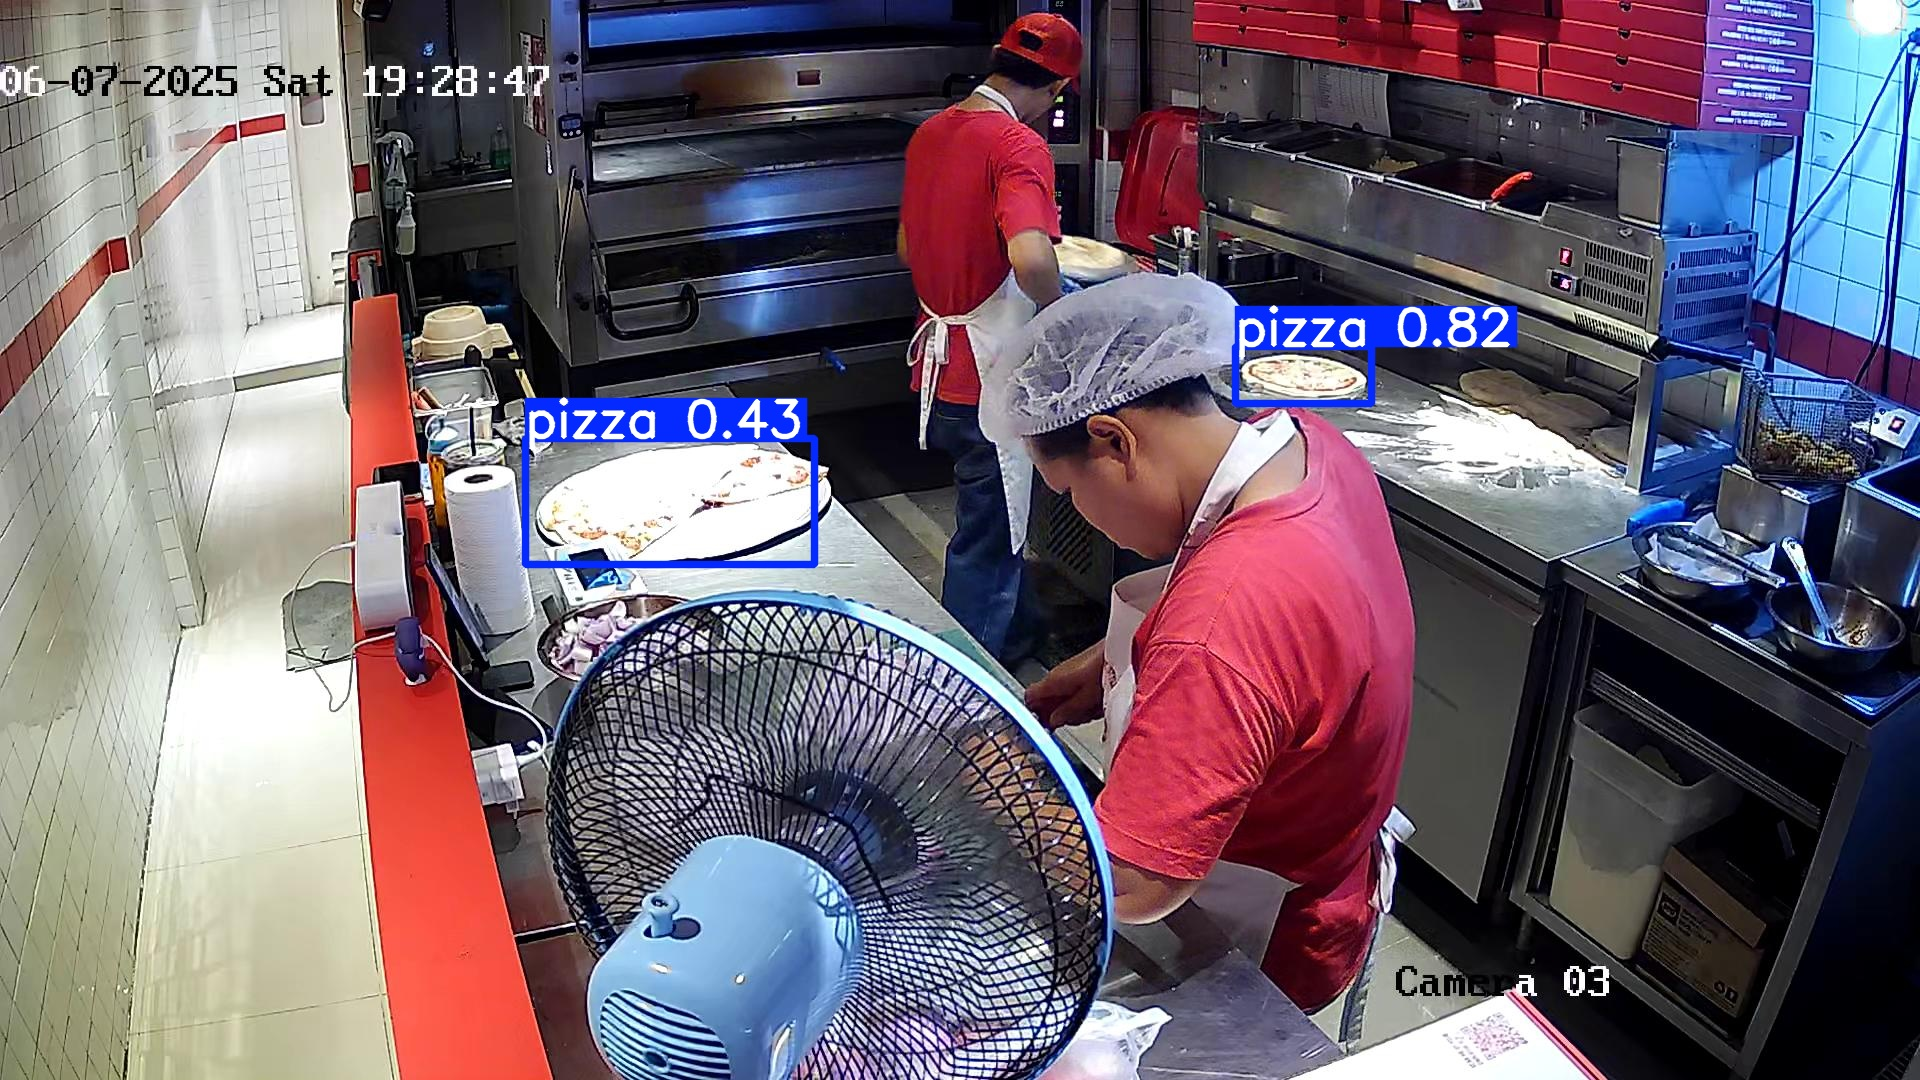


Prediction 3: vlcsnap-2025-06-26-14h12m22s056_png.rf.7d3d8741e574834d21a71de4f39244e8.jpg


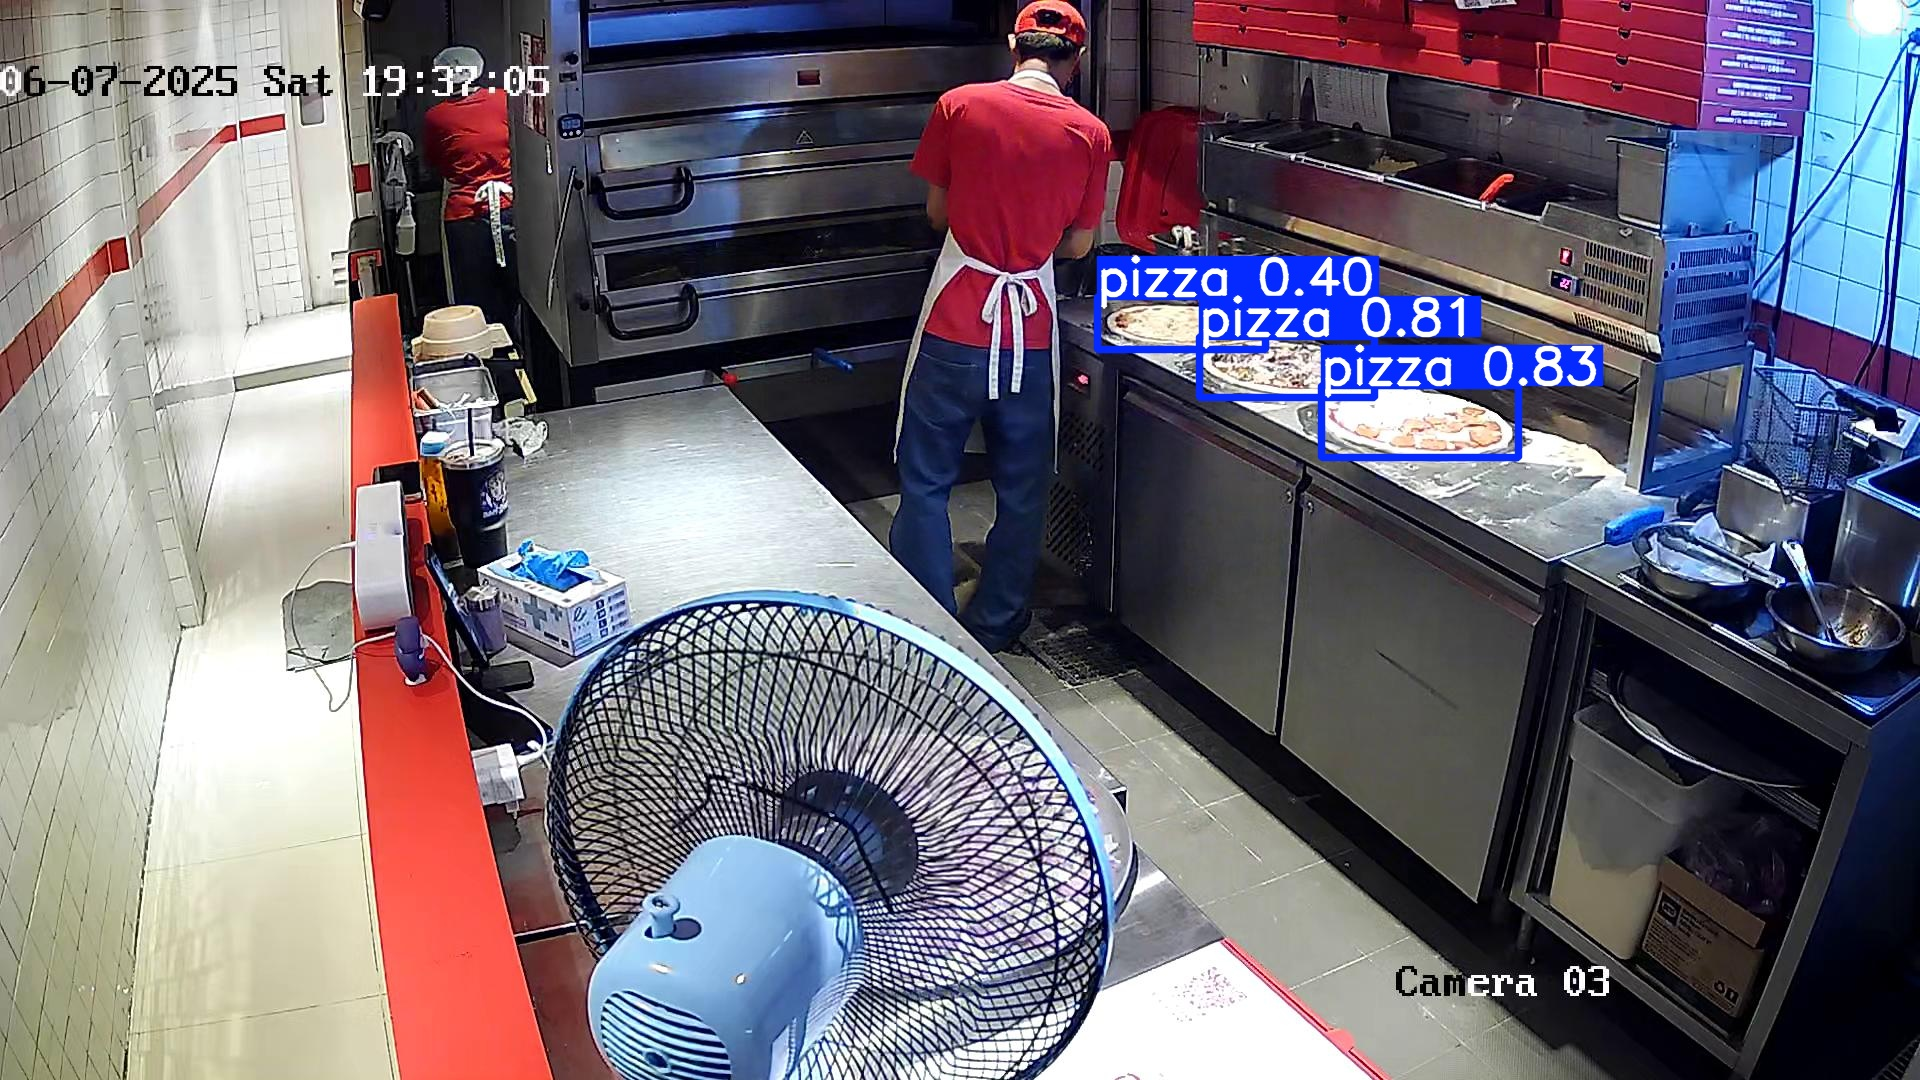


Prediction 4: vlcsnap-2025-06-26-15h23m56s764_png.rf.364c50ba2abee90f78ab8b4195341a38.jpg


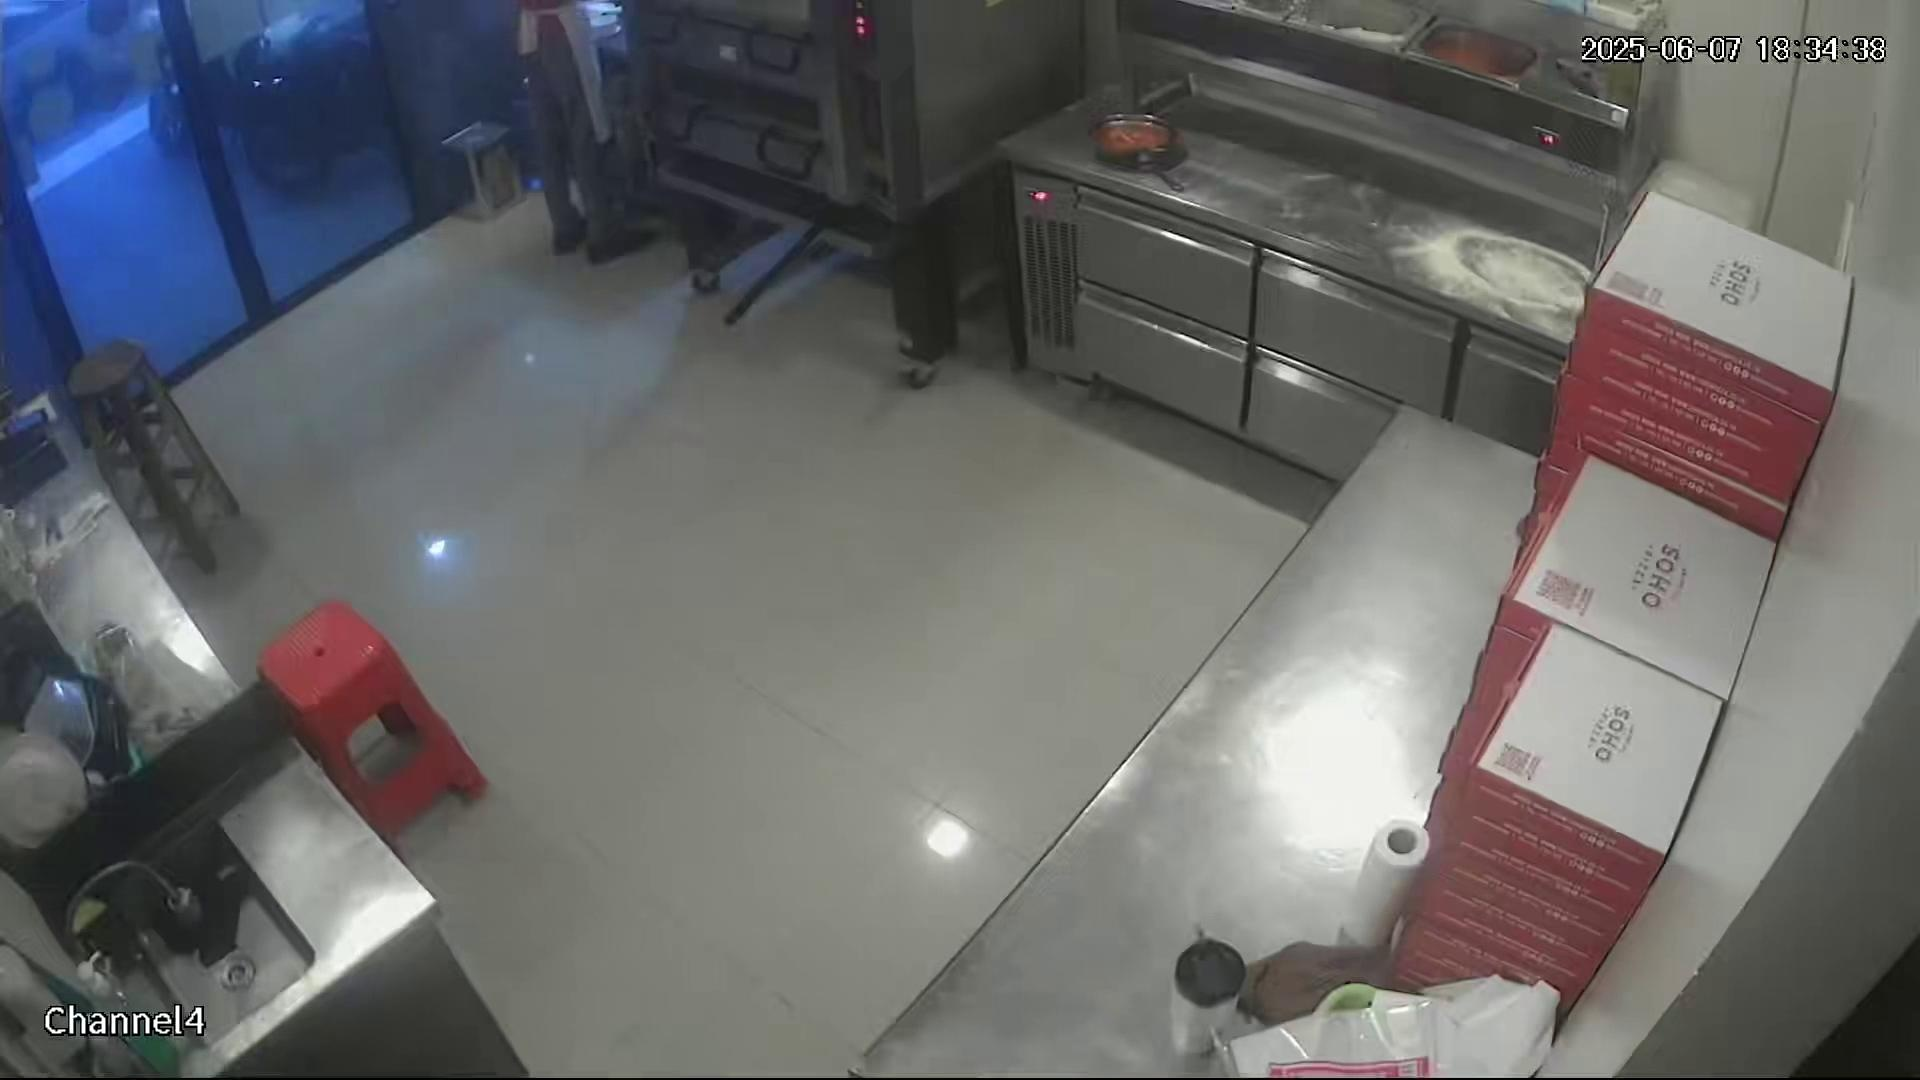


Prediction 5: vlcsnap-2025-06-26-14h55m40s883_png.rf.2d3e5dee635635e88dd841943db2ee91.jpg


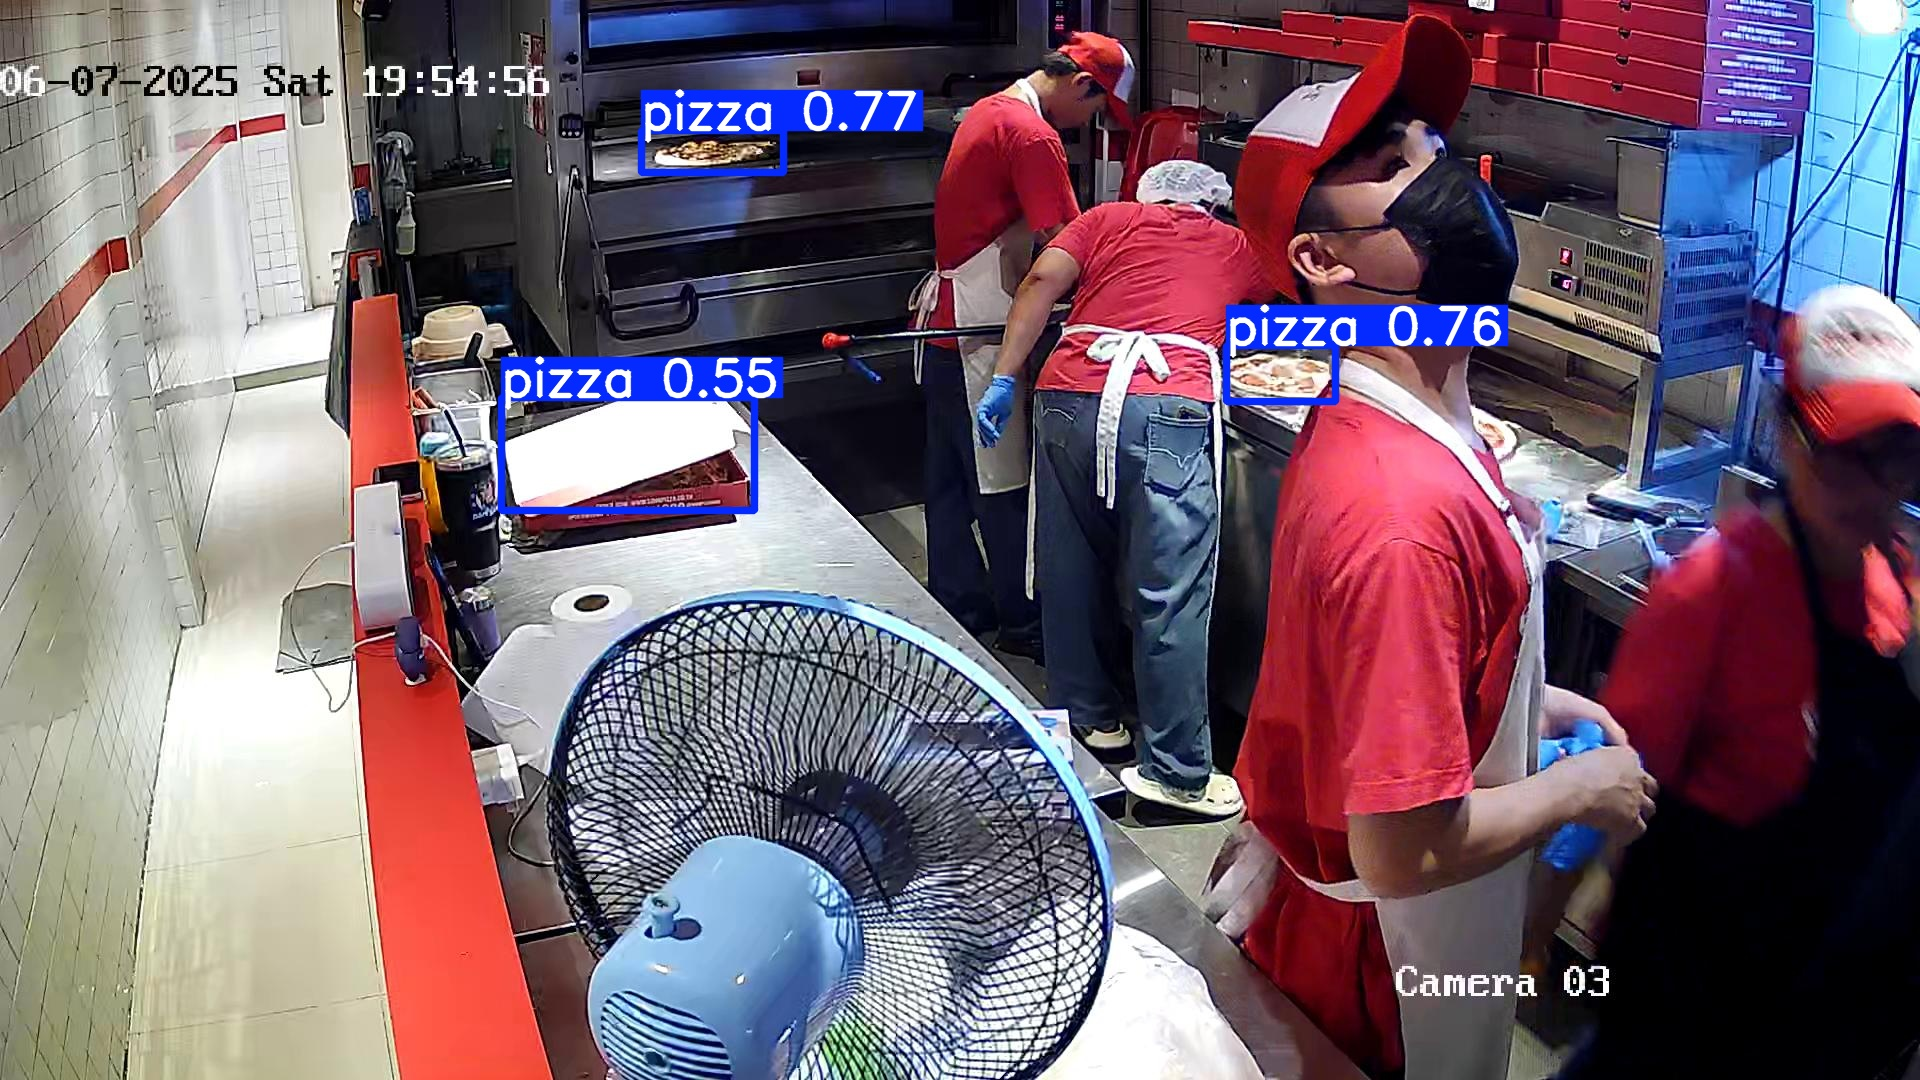

In [ ]:
# Find the latest prediction folder and count images
import glob
import os

# Get display configuration from environment
MAX_DISPLAY_IMAGES = int(os.getenv('MAX_DISPLAY_IMAGES', '5'))
DISPLAY_WIDTH = int(os.getenv('DISPLAY_WIDTH', '600'))

latest_predict_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
prediction_images = glob.glob(f'{latest_predict_folder}/*.jpg')

print(f"Inference results in: {latest_predict_folder}")
print(f"Found {len(prediction_images)} prediction images")
print(f"Displaying first {MAX_DISPLAY_IMAGES} images with width {DISPLAY_WIDTH}px")

# Display inference results
from IPython.display import Image as IPyImage, display

# Display first N prediction results based on environment variable
for i, img_path in enumerate(prediction_images[:MAX_DISPLAY_IMAGES]):
    print(f"\nPrediction {i+1}: {os.path.basename(img_path)}")
    display(IPyImage(filename=img_path, width=DISPLAY_WIDTH))

## Model Export and Usage

Export the trained model for deployment.

In [ ]:
# Load the trained model for export
from ultralytics import YOLO
import os

# Get export configuration from environment
EXPORT_FORMAT = os.getenv('EXPORT_FORMAT', 'onnx')

model = YOLO(best_model_path)
print(f"Loaded model: {best_model_path}")

# Export to specified format for broader compatibility
print(f"🚀 Exporting model to {EXPORT_FORMAT.upper()} format...")
model.export(format=EXPORT_FORMAT)
print(f"Model exported to {EXPORT_FORMAT.upper()} format")

# Display model information
print("\n📊 Model Information:")
model.info()

In [ ]:
# Final model summary
print("=" * 50)
print("PIZZA DETECTION MODEL TRAINING COMPLETE")
print("=" * 50)
print(f"Best model saved at: {best_model_path}")
print(f"Training results: {train_results_dir}")
print(f"Dataset used: {DATASET_PATH}")
print("\nModel is ready for pizza detection!")
print("You can use the model with:")
print(f'model = YOLO("{best_model_path}")')
print('results = model.predict("your_image.jpg")')